# **University Admit Eligibility Predictor**

## >>Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import jarque_bera

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale=1.5)

## >>Reading the Dataset

In [2]:
# read_csv()>>reads the dataset from the csv file.
data = pd.read_csv(r'Dataset/Admission_Predict.csv')
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


## >>Analyze The Data

In [3]:
# head() function used to view the first five csv file data.
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Serial number column is unwanted data for prediction of data.
# drop() function delete the Serial No. column from data.

data.drop(["Serial No."],axis = 1 ,inplace=True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
# describe() function computes a summary of statistics like count, mean, standard deviation, min, max, and quartile values.
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
# info() function gives information about the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


## >>Handling Missing Values

In [7]:
# isnull().any() function used to find null values or NaN values in the given dataset by boolean values.
data.isnull().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [8]:
# isnull().sum() function to check the number of null values present in the columns. 
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## >>Data Visualization

## 1.Univariate Analysis

## I) Histogram 

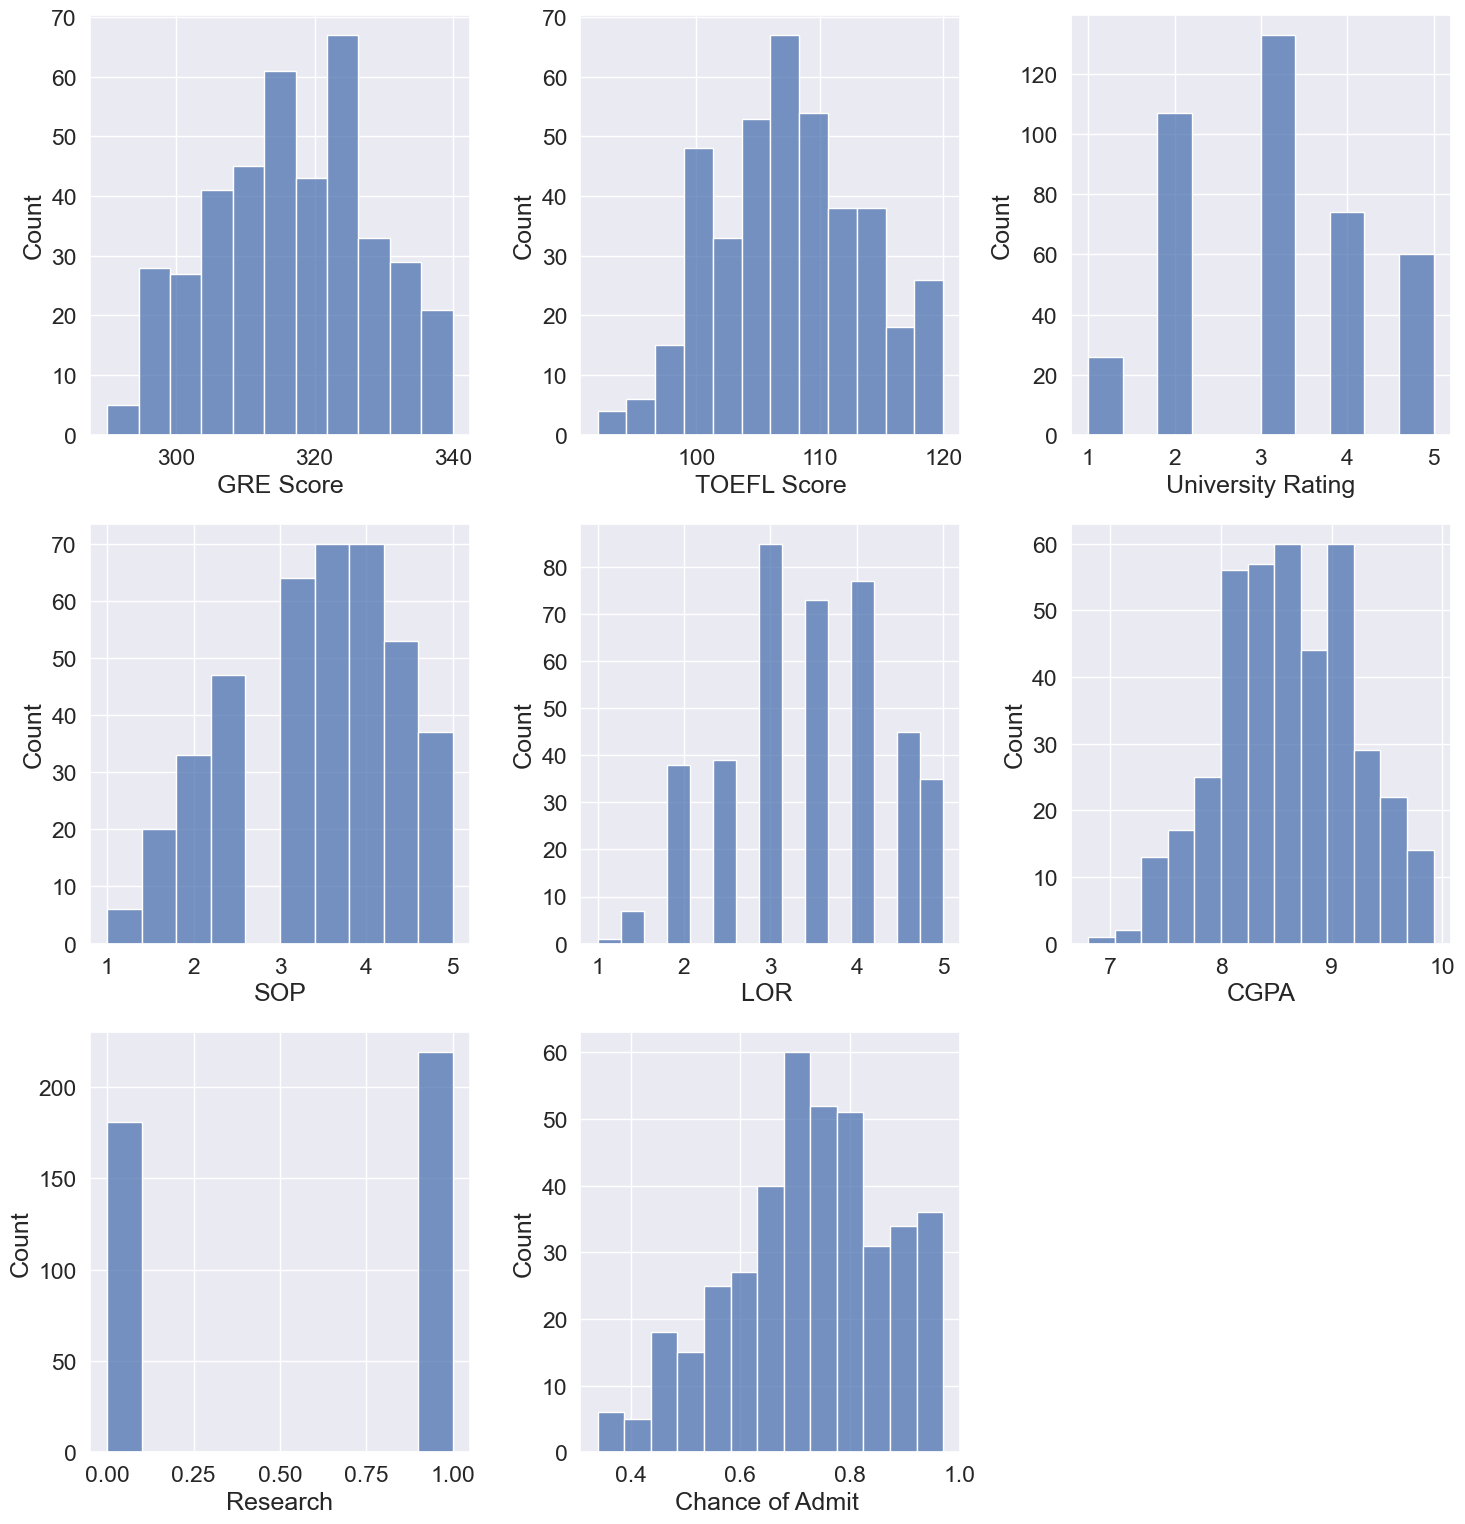

In [9]:
cols = 3
rows = 4
num_cols = data.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = data[col], ax = ax, data=data)
    
fig.tight_layout()  
plt.show()

## II) Distplot

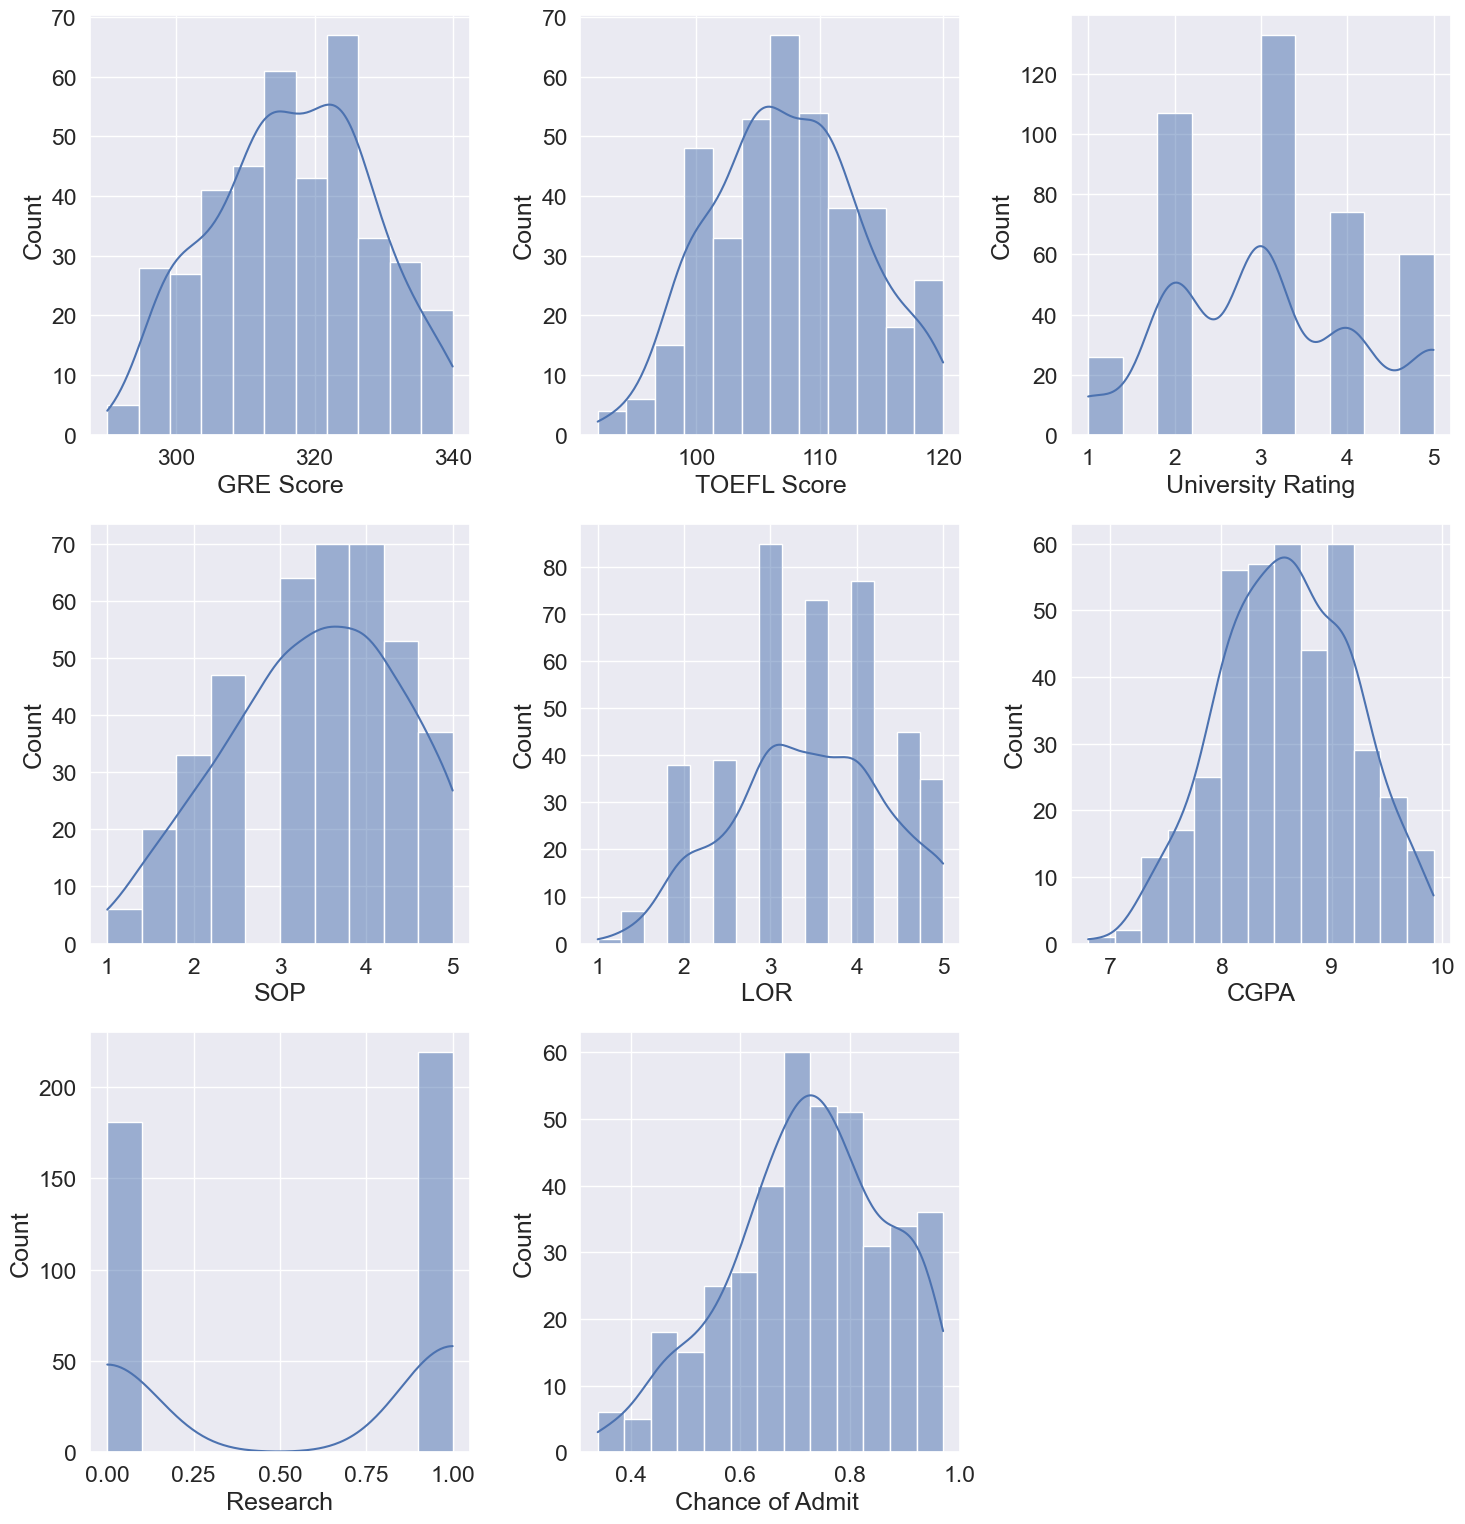

In [10]:
cols = 3
rows = 4
num_cols = data.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = data[col], ax = ax, data=data, kde='True')
    
fig.tight_layout()  
plt.show()

## III) Boxplot

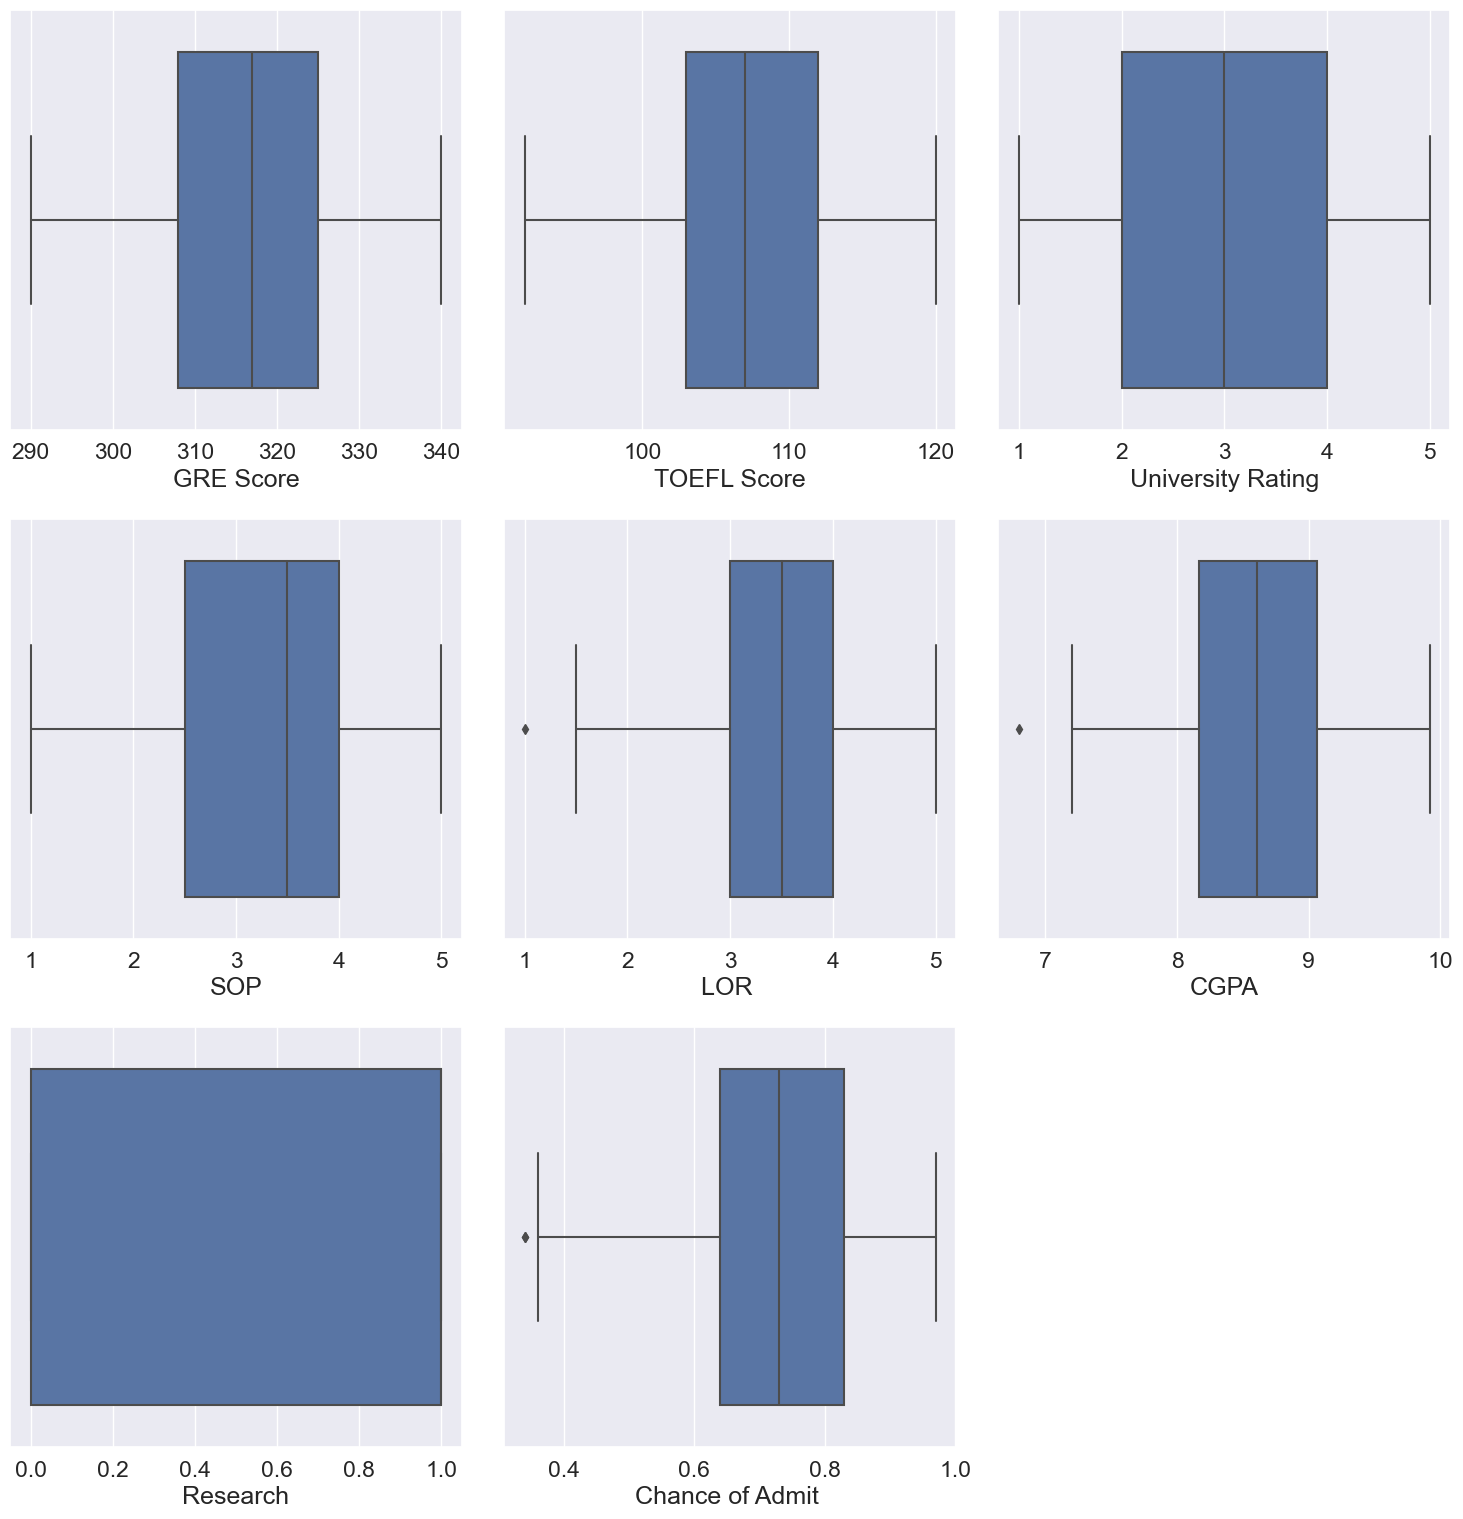

In [11]:
cols = 3
rows = 4
num_cols = data.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.boxplot(x = data[col], ax = ax)
    
fig.tight_layout()  
plt.show()

## 2.Bivariate Analysis 

## I) Scatterplot

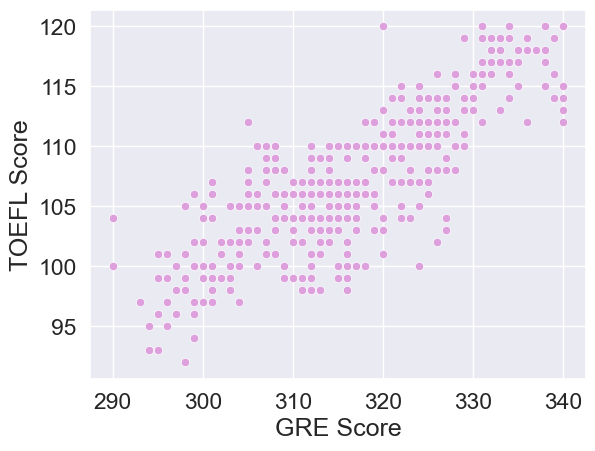

In [12]:
sns.scatterplot(x='GRE Score', y='TOEFL Score', data = data, color="plum")
plt.show()

## II) Catplot

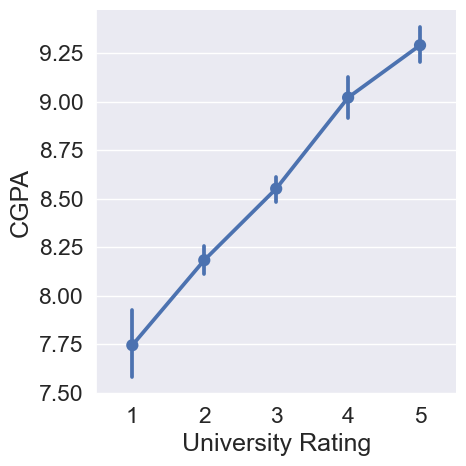

In [13]:
sns.catplot(x='University Rating', y='CGPA', data=data, kind='point')
plt.show()

## 2.Multivariate Analysis

## I) Pairplot

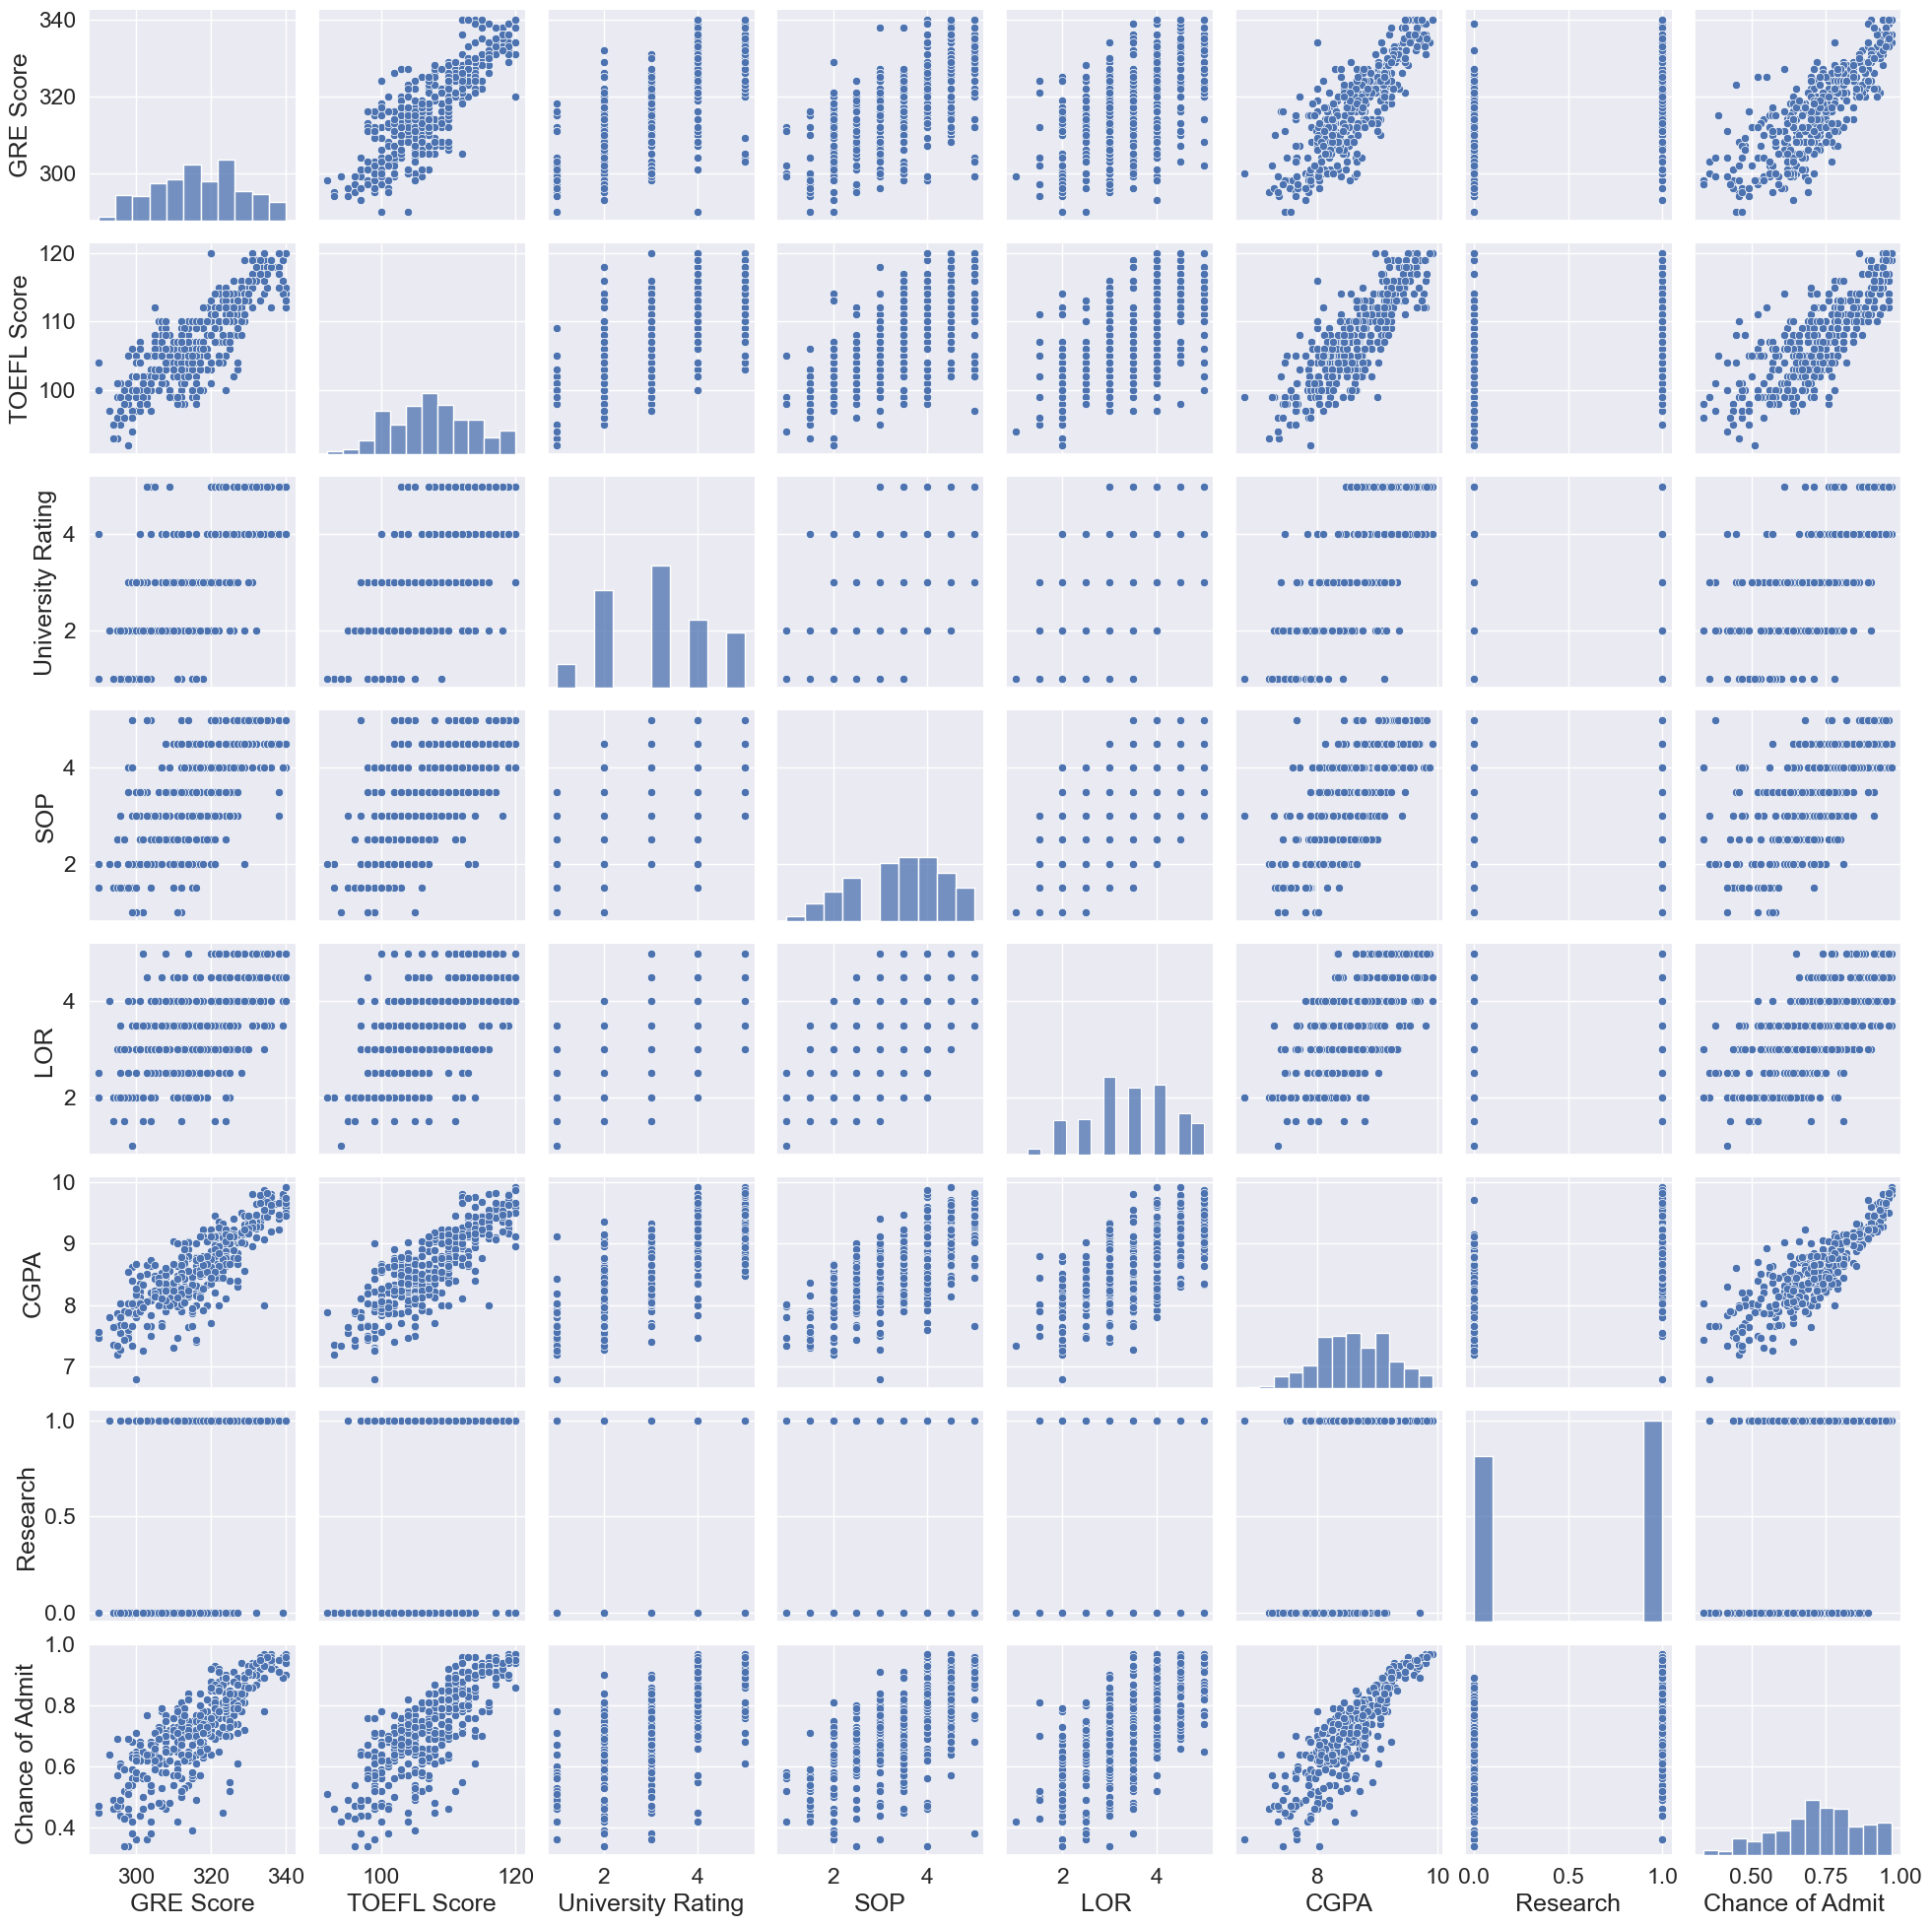

In [14]:
sns.pairplot(data=data, palette = 'Dark2')

## >> Splitting Dependent And Independent Columns

In [15]:
x = data.iloc[:,0:7].values
x

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 116.  ,   4.  , ...,   4.5 ,   9.45,   1.  ],
       [312.  , 103.  ,   3.  , ...,   4.  ,   8.78,   0.  ],
       [333.  , 117.  ,   4.  , ...,   4.  ,   9.66,   1.  ]])

In [16]:
y = data.iloc[:,7:].values
y

array([[0.92],
       [0.76],
       [0.72],
       [0.8 ],
       [0.65],
       [0.9 ],
       [0.75],
       [0.68],
       [0.5 ],
       [0.45],
       [0.52],
       [0.84],
       [0.78],
       [0.62],
       [0.61],
       [0.54],
       [0.66],
       [0.65],
       [0.63],
       [0.62],
       [0.64],
       [0.7 ],
       [0.94],
       [0.95],
       [0.97],
       [0.94],
       [0.76],
       [0.44],
       [0.46],
       [0.54],
       [0.65],
       [0.74],
       [0.91],
       [0.9 ],
       [0.94],
       [0.88],
       [0.64],
       [0.58],
       [0.52],
       [0.48],
       [0.46],
       [0.49],
       [0.53],
       [0.87],
       [0.91],
       [0.88],
       [0.86],
       [0.89],
       [0.82],
       [0.78],
       [0.76],
       [0.56],
       [0.78],
       [0.72],
       [0.7 ],
       [0.64],
       [0.64],
       [0.46],
       [0.36],
       [0.42],
       [0.48],
       [0.47],
       [0.54],
       [0.56],
       [0.52],
       [0.55],
       [0.

In [17]:
x.shape

(400, 7)

In [18]:
y.shape

(400, 1)

## >>Splitting The Data Into Train And Test

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(x, y, test_size = 0.2,random_state = 10)

In [20]:
Y_train = (Y_train>0.5)
Y_train

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [21]:
Y_test = (Y_test>0.5)
Y_test

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [

## >>Model Building

## 1. Training And Testing The Model

In [22]:
cls = LogisticRegression(random_state = 0)

In [23]:
cls.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [24]:
y_pred = cls.predict(X_test)
y_pred

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

## 2. Model Evaluation

In [25]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix

In [26]:
print("\nAccuracy score:%f" %(accuracy_score(Y_test,y_pred)*100))
print("Recall score:%f" %(recall_score(Y_test,y_pred)*100))
print("ROC score : %f\n" %(roc_auc_score(Y_test,y_pred)*100))
print(confusion_matrix(Y_test,y_pred))


Accuracy score:91.250000
Recall score:97.333333
ROC score : 48.666667

[[ 0  5]
 [ 2 73]]


## 3. Save The Model

In [28]:
import pickle
pickle.dump(cls,open('university.pkl','wb'))
model=pickle.load(open('university.pkl','rb'))